### Bağımsız İki Örneklem Testi

İki farklı grubun parametrelerinin karşılaştırılması için uygulanır.

    Varsayımlar: Normal Dağılım, Varyans Homojenliği
    Örnek Uygulama: Bir yapay zeka modeli satış sistemine entegre edildi ve yapay zekayı kullandığımız ve
    kullanmadığımız iki grubu karşılaştırmak istiyoruz.
    
    Hipotezler: H0: iki grup gelir ortalamalari arasinda anlamli bir fark yoktur.
                H1: iki grup gelir ortalamalari arasinda anlamli bir fark vardir.

In [10]:
import pandas as pd,numpy as np,seaborn as sns

<b>Fonksiyon için data yı doğru formata sokuyoruz

In [43]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25],columns=["gelir"])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29],columns=["gelir"])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
newA = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
newB = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([newA,newB])
AB.columns = ["gelir","GRUP"]
print(AB.head())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A


In [9]:
#Varsayım kontrolü  1- Normallik

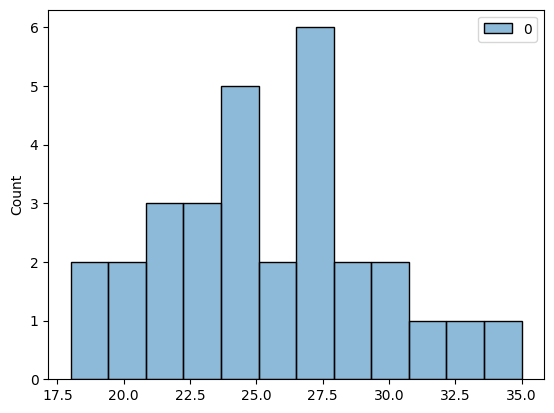

In [34]:
#histogram
sns.histplot(data=A,bins=12);

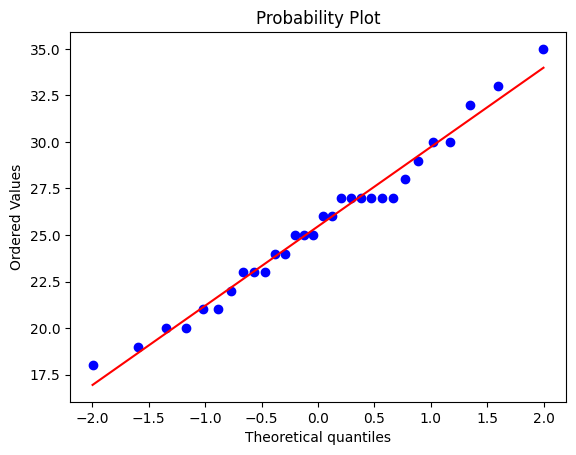

In [51]:
import matplotlib.pyplot as plt

stats.probplot(A.gelir, dist="norm", plot=plt);

In [52]:
#Shapiro-Wilks testi
from scipy.stats import shapiro

In [53]:
shapiro(A.gelir)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [54]:
shapiro(B.gelir)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

<b>Sonuclara bakilirsa normal dagilim saglandi

In [56]:
#Varyans homojenligi saglama
stats.levene(A.gelir,B.gelir)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

<b>p-value'ya göre homojendir
   
<b>Artık testimizi uygulayabiliriz

In [57]:
stats.ttest_ind(A["gelir"],B["gelir"],equal_var=True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

<b>p-value küçük olduğundan h0 reddedilir 
yani anlamli bir fark vardir, yapay zeka modeli ise yaramis demektir.

### Eğer varsayımlar sağlanmazsa !!

In [58]:
stats.mannwhitneyu(A["gelir"],B["gelir"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

<b>p Value küçük olduğunda H0 reddedebiliriz. yani anlamli bir fark vardir, yapay zeka modeli ise yaramis demektir.
